In [1]:
from mvpa2 import cfg
from mvpa2.suite import *
import numpy as np
import glob
import os
from scipy.io import loadmat
from scipy.spatial.distance import squareform,pdist
from scipy.stats import rankdata,pearsonr
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
#import seaborn as sns

/Users/frankanayet/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:95: DeprecationWarning: `scipy.weave` is deprecated, use `weave` instead!
  warnings.warn(depdoc, DeprecationWarning)
/Users/frankanayet/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:95: DeprecationWarning: `scipy.linalg.calc_lwork` is deprecated!

calc_lwork was an internal module in Scipy and has been removed.

Several functions in scipy.linalg.lapack have *_lwork variants
that perform the lwork calculation (from Scipy >= 0.15.0), or
allow passing in LWORK=-1 argument to perform the computation.


  warnings.warn(depdoc, DeprecationWarning)


In [2]:
#sns.set_style('white')
#sns.set_style('ticks')
#sns.set_palette('bright')
#sns.set_color_codes('bright')

In [3]:
basepath = '/fMRI/NLine-Space'
os.chdir(basepath)

Define variables

In [11]:
SUBNUM = ['s_03001'] # Peter for now
LABELS = ['0.07','0.07','0.09','0.09','0.11','0.11','0.21','0.21','0.28','0.28','0.33','0.33','0.36','0.36',
          '0.45','0.45','0.57','0.57','0.6','0.6','0.65','0.65','0.74','0.74','0.77','0.77','0.85','0.85',
          '0.91','0.91','0.93','0.93']
RUNS = ['run1','run2','run3','run4']
tasks = ['Pos']
nr = len(SUBNUM)
#Changed the names of ROIs from Area1 and 2 to IPS0 L & R for consistency
ROIS = ['IPS_L_12mSphere.nii.gz', 'IPS_R_12mSphere.nii.gz', 'IPS0_L_standard.nii.gz', 'IPS0_R_standard.nii.gz']

In [12]:
len(LABELS)

32

In [5]:
field_names = []
for ROI in ROIS:
    roi = ROI.index('_')
    field_names.append(ROI[0:roi+2])
field_names

['IPS_L', 'IPS_R', 'IPS0_L', 'IPS0_R']

In [13]:
def plot_mtx(mtx, labels, title):
    #sns.set_palette('coolwarm',7)
    plt.figure(figsize=(10, 10))
    plt.imshow(mtx, interpolation='nearest')
    plt.xticks(range(len(mtx)), labels, rotation=-90)
    plt.yticks(range(len(mtx)), labels)
    plt.title(title)
    plt.clim((0,1))
    plt.colorbar()
    filename = subjpath+title+'.pdf'
    plt.savefig(filename)

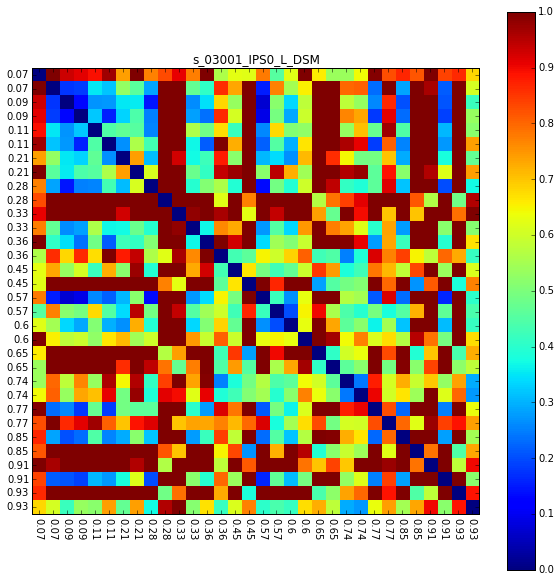

In [16]:
s = SUBNUM[0]
subjpath = basepath+'/'+s+'/Peter_ROI/'
ROI = ROIS[2]
ROIpath = subjpath+ROI
brain_task = subjpath+'s_03001_N_run1_sorted_standard.nii.gz'
mat_name = s+'_'+field_names[2]+'_DSM'
ds = fmri_dataset(brain_task, mask=ROIpath)
dsm = measures.rsa.PDist(square=True)
res = dsm(ds)
plot_mtx(res, LABELS, mat_name)
brain_mat = dsm(ds).samples

In [ ]:
#ax = sns.heatmap(res,vmin=0,vmax=1,xticklabels=LABELS,yticklabels=LABELS,cmap="coolwarm")

s_03001
IPS_L_12mSphere.nii.gz
run1
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run1_sorted_standard.nii.gz
run2
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run2_sorted_standard.nii.gz
run3
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run3_sorted_standard.nii.gz
run4
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run4_sorted_standard.nii.gz
IPS_R_12mSphere.nii.gz
run1
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run1_sorted_standard.nii.gz
run2
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run2_sorted_standard.nii.gz
run3
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run3_sorted_standard.nii.gz
run4
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run4_sorted_standard.nii.gz
IPS0_L_standard.nii.gz
run1
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run1_sorted_standard.nii.gz
run2
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run2_sorted_standard.nii.gz
run3
/fMRI/NLine-Space/s_03001/Peter_ROI//s_03001_N_run3_sorted_standard.nii.gz
run4
/fMRI/NLine-Space/s_03001/Peter_ROI//s

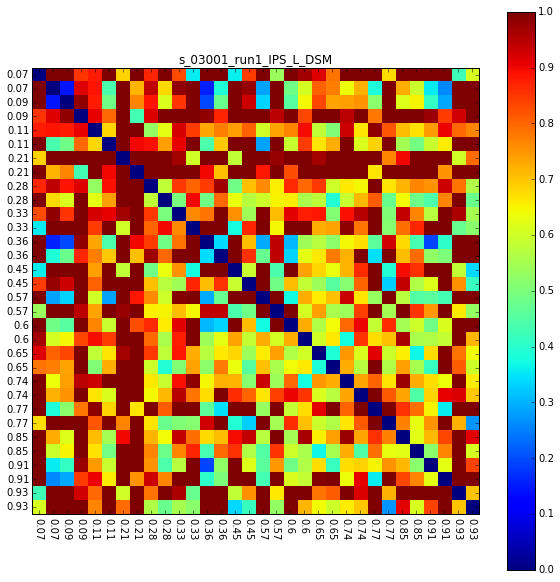

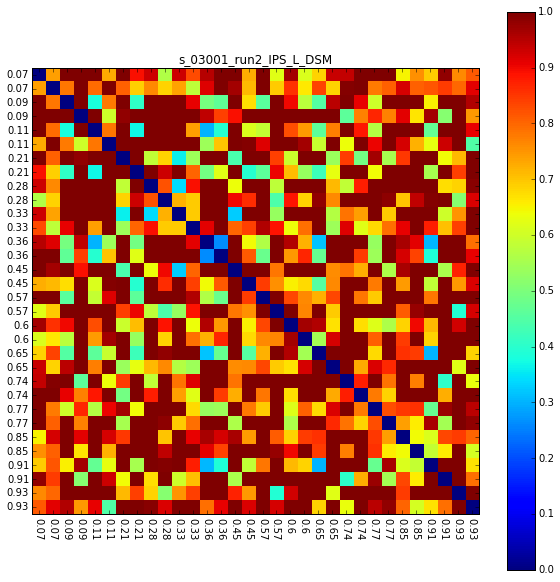

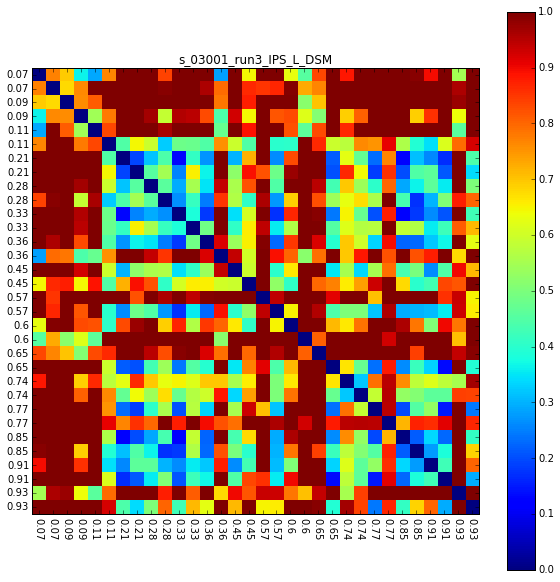

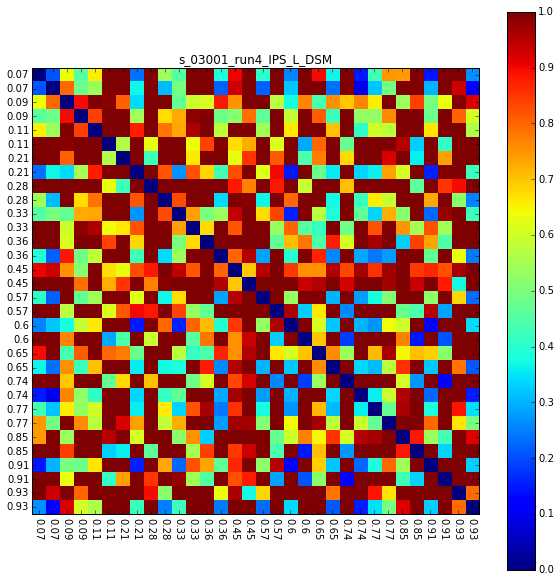

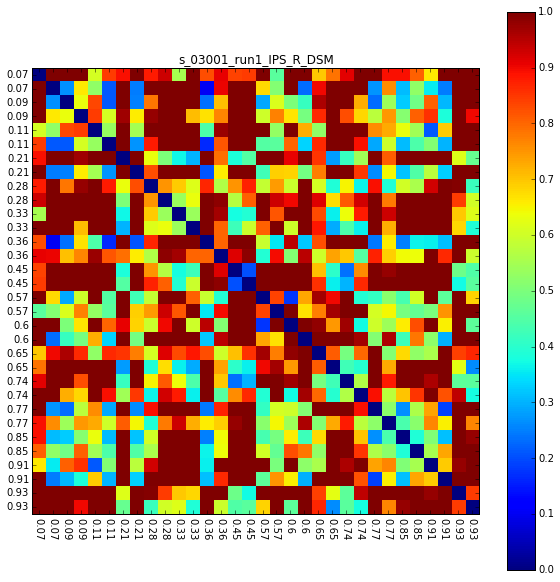

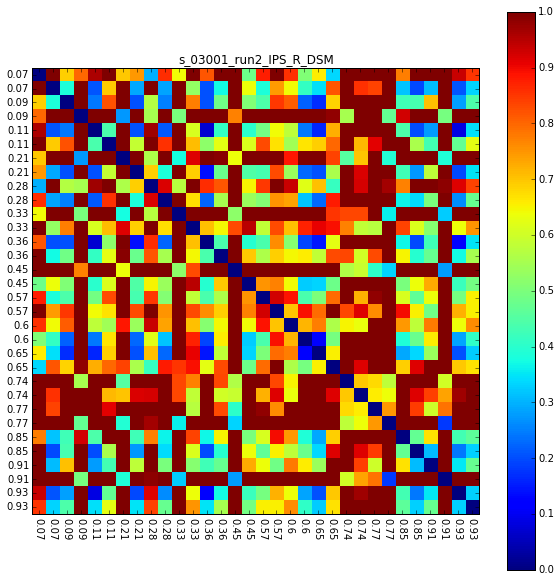

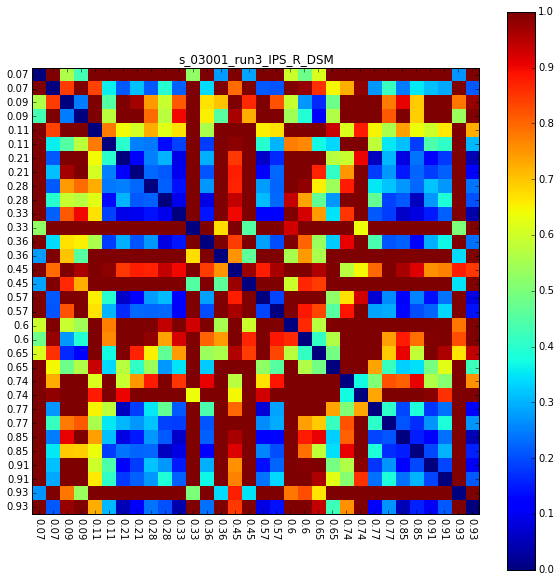

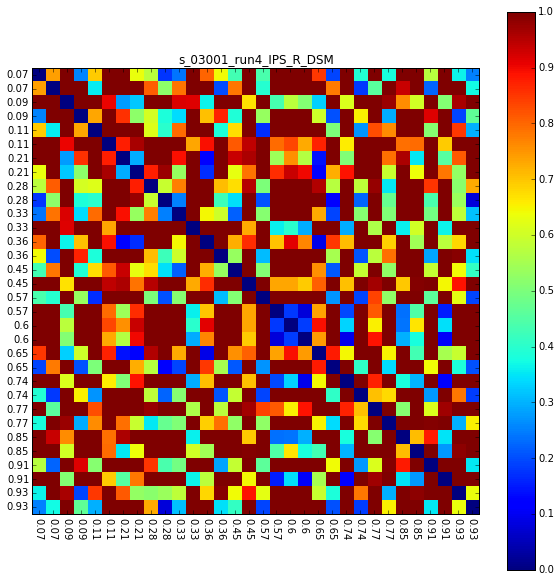

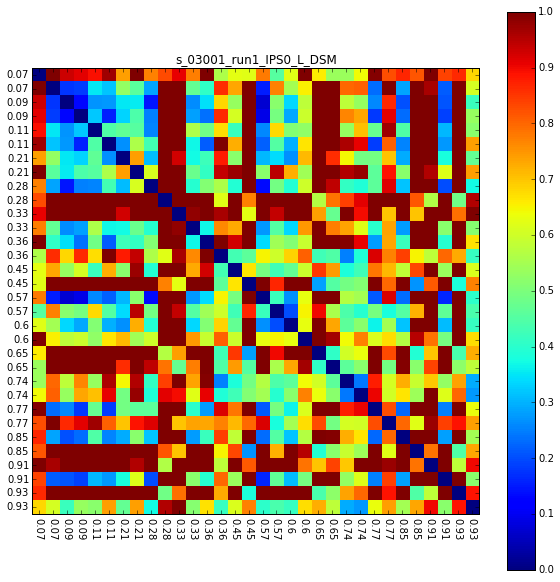

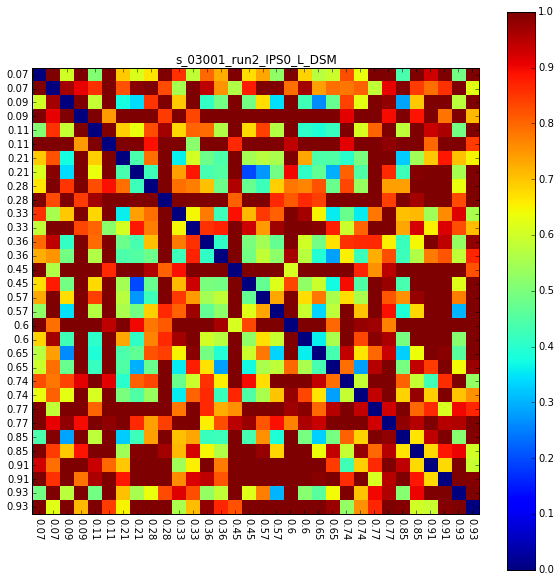

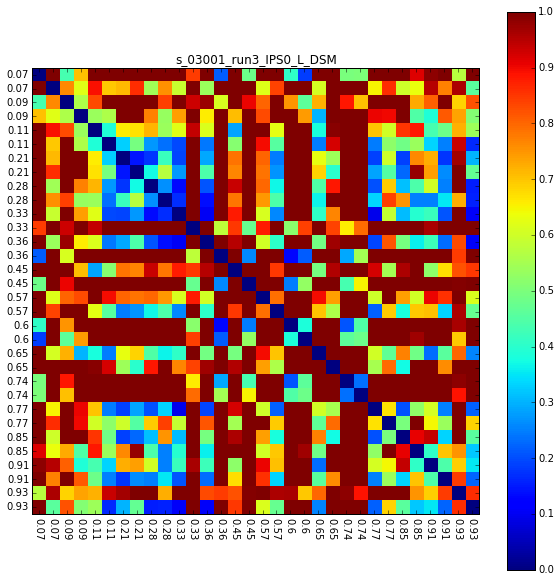

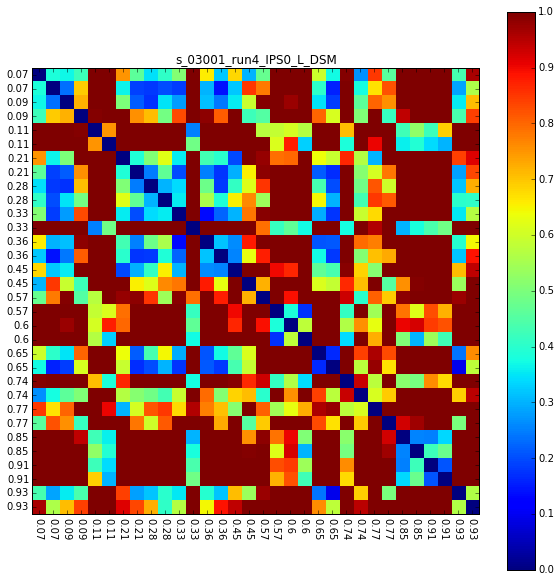

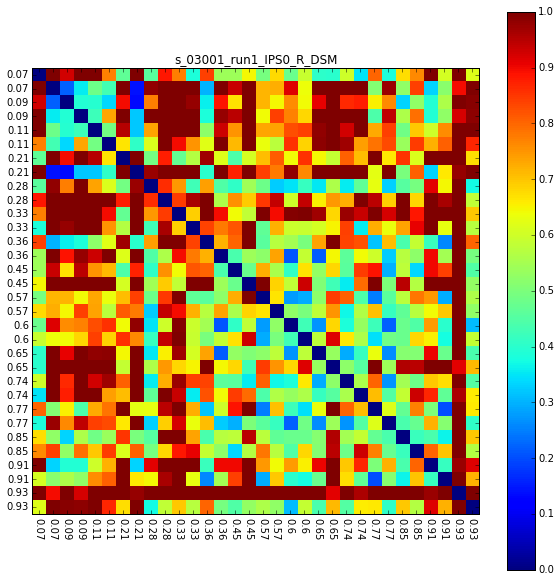

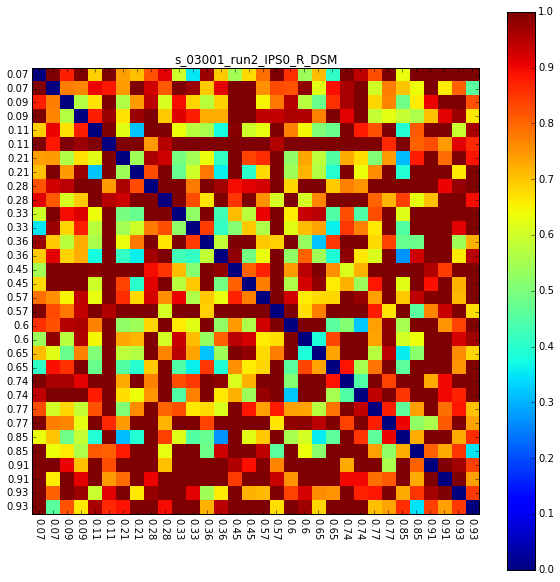

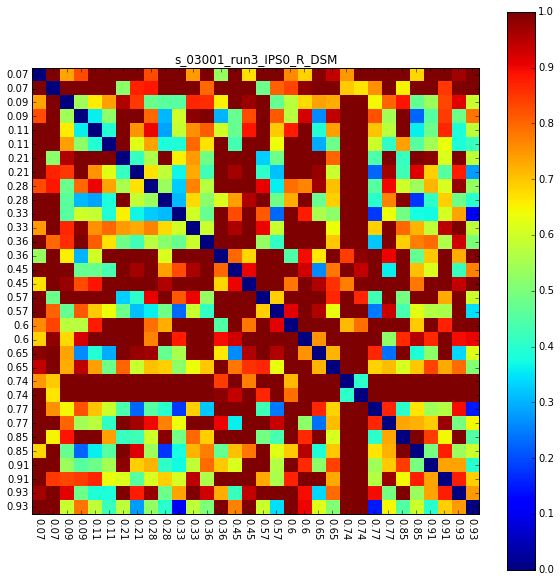

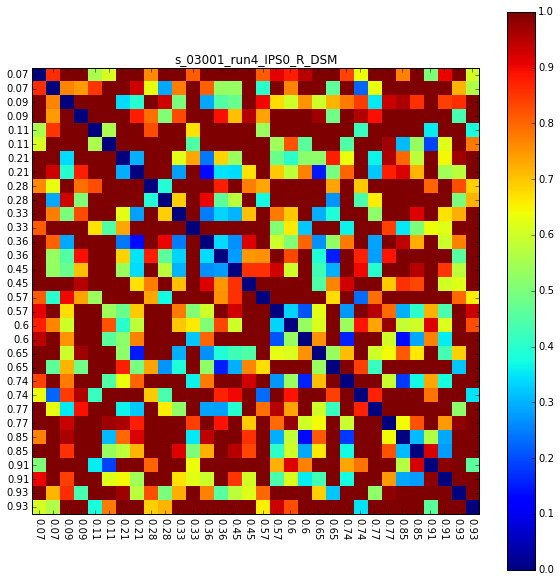

In [18]:
brain_mat_dict = {}
for s in SUBNUM:
    print s
    subjpath = basepath + '/' + s + '/Peter_ROI/'
    for roi in range(0,len(ROIS)):
        ROI = ROIS[roi]
        roi_path = subjpath+ROI
        brain_mat_dict[ROI] = []
        #subjpath = path + '/' + s + '/2ndLevel_AllCond.gfeat'
        #subjpath = path + '/' + s + '/2ndLevel_AllCond_NC.gfeat'
        #print subjpath
        #os.chdir(subjpath)
        print ROI
        for RUN in RUNS:
            print RUN
            #brain_task = subjpath + '/' + TASK + '_allT.nii.gz'
            brain_task = subjpath + '/' + s + '_N_' + RUN + '_sorted_standard.nii.gz'
            mat_name = s+'_'+RUN+'_'+field_names[roi]+'_DSM'
            print brain_task
            
            # define dataset and pick a specific mask (here target is irrelevant)
            ds = fmri_dataset(brain_task, mask=roi_path)
            
        
            # define the comparison
            dsm = measures.rsa.PDist(square=True)
            
            res = dsm(ds)
        
            plot_mtx(res, LABELS, mat_name)
                    
            #Grab the square brain matrix
            brain_mat = dsm(ds).samples
            
            #brain_mat = rankdata(brain_map) right now I am not using this but probably should
            # check if previous step is correct before using
            brain_mat_dict[ROI].append(brain_mat)

In [19]:
brain_mat_dict[ROIS[2]]

[array([[ 0.        ,  1.09323535,  0.93346107, ...,  0.83692047,
          0.86360103,  0.68086239],
        [ 1.09323535,  0.        ,  0.17883719, ...,  0.21691209,
          1.42733457,  0.60749419],
        [ 0.93346107,  0.17883719,  0.        , ...,  0.21000808,
          1.47273696,  0.42162937],
        ..., 
        [ 0.83692047,  0.21691209,  0.21000808, ...,  0.        ,
          1.40738007,  0.51884658],
        [ 0.86360103,  1.42733457,  1.47273696, ...,  1.40738007,
          0.        ,  0.88764601],
        [ 0.68086239,  0.60749419,  0.42162937, ...,  0.51884658,
          0.88764601,  0.        ]]),
 array([[ 0.        ,  1.13284609,  0.60472982, ...,  1.15351121,
          0.49124964,  1.06629816],
        [ 1.13284609,  0.        ,  0.96800681, ...,  0.85808715,
          1.02622625,  0.62416952],
        [ 0.60472982,  0.96800681,  0.        , ...,  1.11647135,
          0.57700635,  1.11250759],
        ..., 
        [ 1.15351121,  0.85808715,  1.11647135, ...,

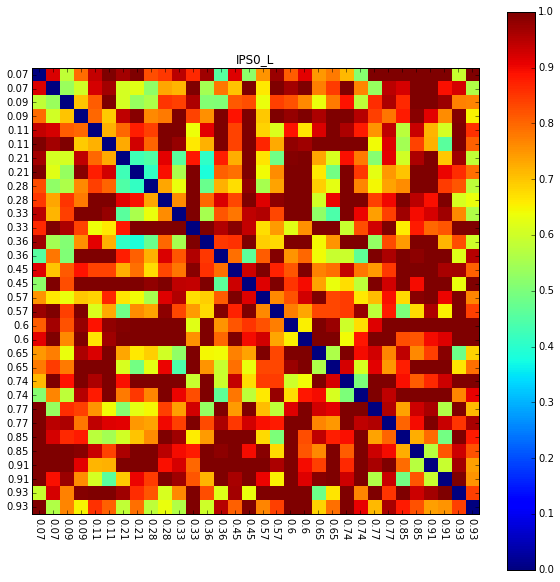

In [20]:
ex_average_mat = np.average(brain_mat_dict[ROIS[2]],axis=0)
plot_mtx(ex_average_mat,LABELS,'IPS0_L')

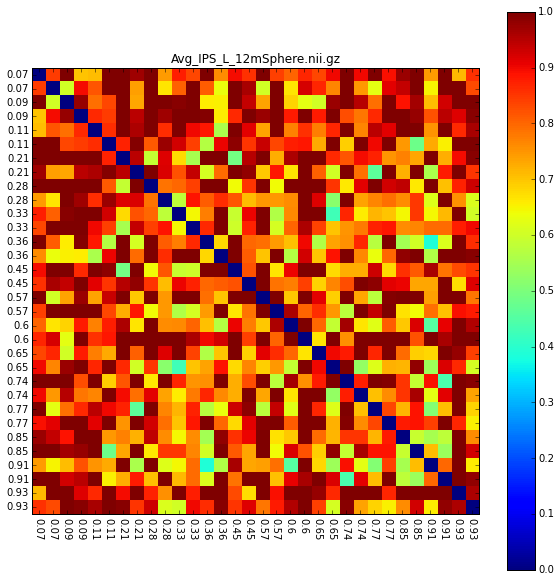

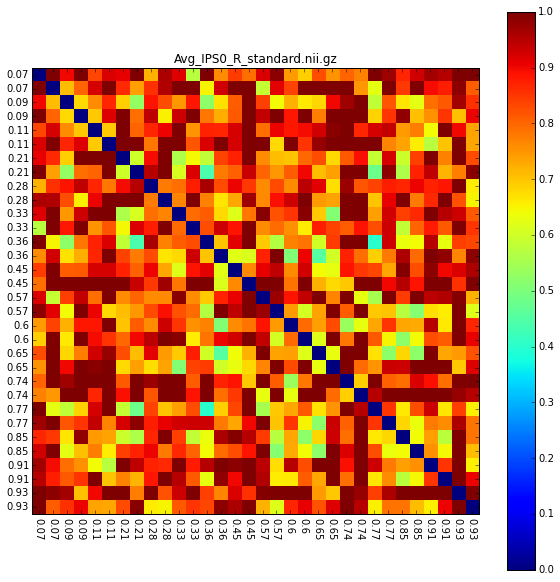

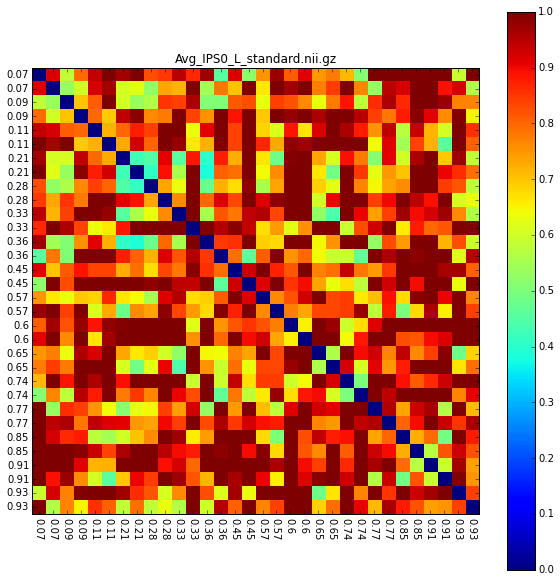

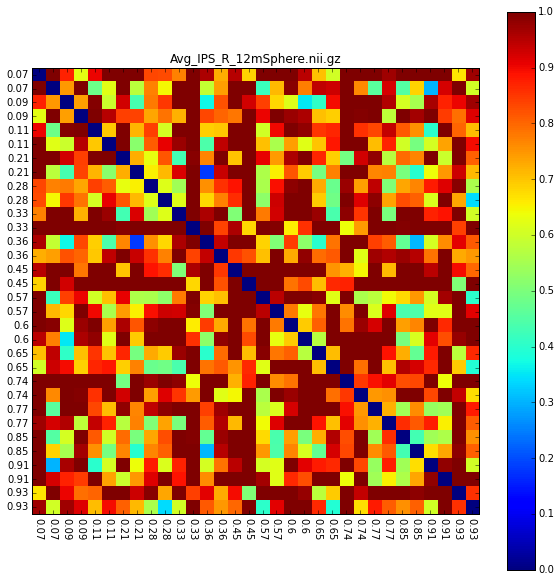

In [21]:
for ROI in brain_mat_dict.keys():
    avg_mat = np.average(brain_mat_dict[ROI], axis=0)
    tit = 'Avg_'+ROI
    plot_mtx(avg_mat,LABELS,tit)

In [22]:
from sklearn import manifold
from sklearn.decomposition import PCA

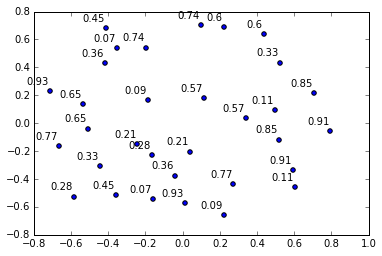

In [27]:
ex_average_mat = np.average(brain_mat_dict[ROIS[2]],axis=0)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(ex_average_mat).embedding_
# Rotate the data
clf = PCA(n_components=2)
pos = clf.fit_transform(pos)
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='b')
for label, x, y in zip(LABELS, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-2, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom')

In [24]:
s = SUBNUM[0]
subjpath = basepath+'/'+s+'/Peter_ROI/'
ROI = ROIS[0]
ROIpath = subjpath+ROI
brain_task = subjpath+'s_03001_N_run1_sorted_standard.nii.gz'
mat_name = s+'_'+field_names[2]+'_DSM'
ds = fmri_dataset(brain_task, mask=ROIpath)
dsm = measures.rsa.PDist(square=True)
res = dsm(ds)

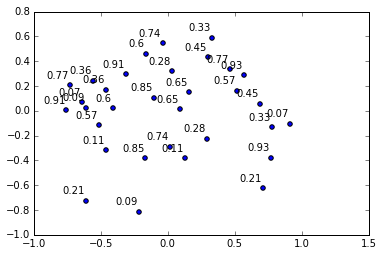

In [26]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(res).embedding_
# Rotate the data
clf = PCA(n_components=2)
pos = clf.fit_transform(pos)
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='b')
for label, x, y in zip(LABELS, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-2, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom')

In [28]:
def plot_mds(pos, labels, title):
    #sns.set_palette('coolwarm',7)
    plt.figure(figsize=(10, 10))
    plt.scatter(pos[:, 0], pos[:, 1], s=20, c='b')
    for label, x, y in zip(labels, pos[:, 0], pos[:, 1]):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-2, 5),
            textcoords = 'offset points', ha = 'right', va = 'bottom')
        filename = subjpath+'MDS/'+title+'.pdf'
    plt.title(title)
    plt.savefig(filename)

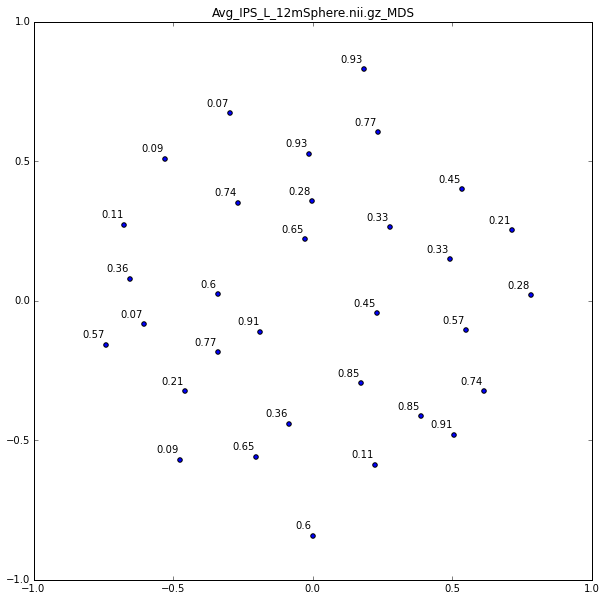

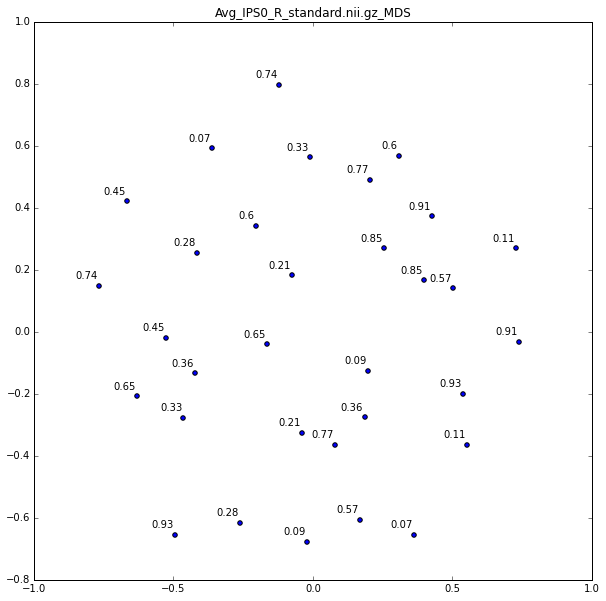

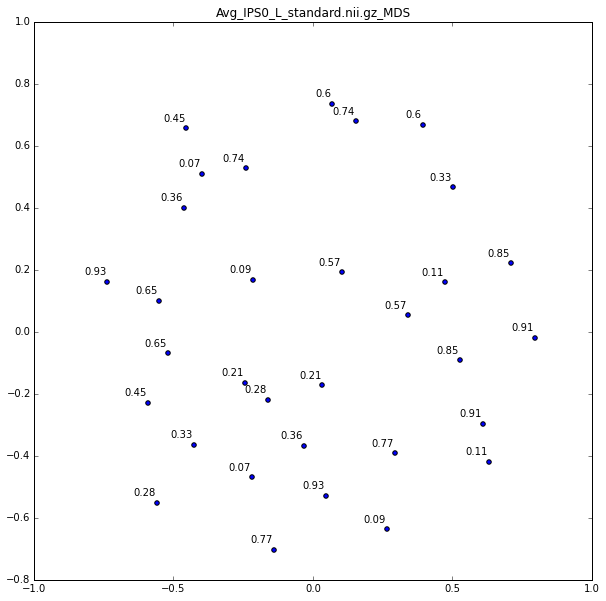

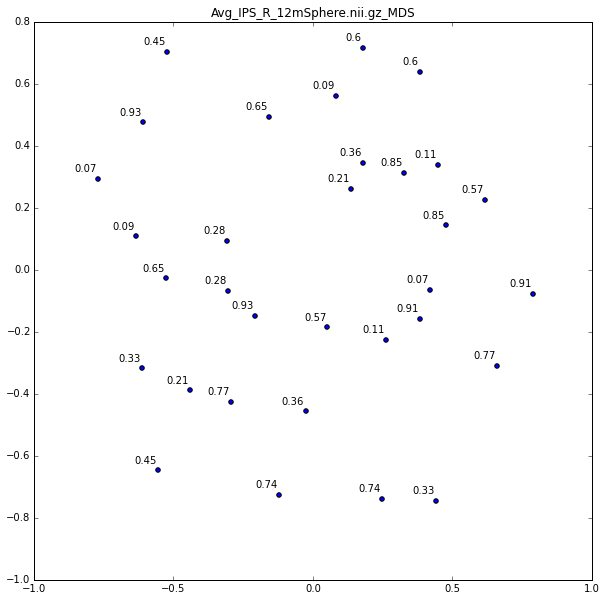

In [29]:
for ROI in brain_mat_dict.keys():
    avg_mat = np.average(brain_mat_dict[ROI], axis=0)
    tit = 'Avg_'+ROI+'_MDS'
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                       dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(avg_mat).embedding_
    # Rotate the data
    clf = PCA(n_components=2)
    pos = clf.fit_transform(pos)
    plot_mds(pos,LABELS,tit)

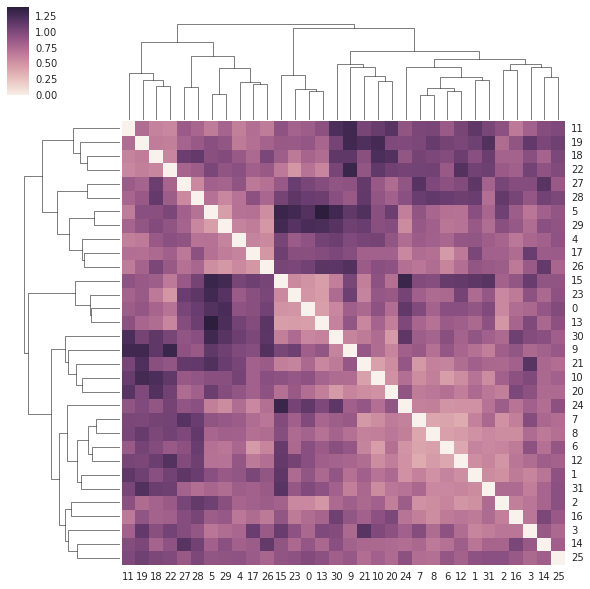

In [30]:
import seaborn as sns
ex_average_mat = np.average(brain_mat_dict[ROIS[2]],axis=0)
g = sns.clustermap(ex_average_mat,)
reordered = [LABELS[x] for x in g.dendrogram_row.reordered_ind]

In [31]:
reordered = [LABELS[x] for x in g.dendrogram_row.reordered_ind]
reordered

['0.33',
 '0.6',
 '0.6',
 '0.74',
 '0.85',
 '0.91',
 '0.11',
 '0.91',
 '0.11',
 '0.57',
 '0.85',
 '0.45',
 '0.74',
 '0.07',
 '0.36',
 '0.93',
 '0.28',
 '0.65',
 '0.33',
 '0.65',
 '0.77',
 '0.21',
 '0.28',
 '0.21',
 '0.36',
 '0.07',
 '0.93',
 '0.09',
 '0.57',
 '0.09',
 '0.45',
 '0.77']